In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('after_clean_concat_dataset.csv',delimiter=',')
df.shape

(408648, 11)

In [4]:
df.head()

,App Name,App Store,App ID,Review ID,Country,Version,Rating,Date,Subject,Body,Emotion
0,Google Maps,iOS,585027354,2361429743,China,4.47,5,2018-03-30,Comments can use it?,"Obviously also used before, why not now ah",NaN
1,Google Maps,iOS,585027354,2361409552,China,4.47,1,2018-03-30,Blank,After downloading are they not ah,NaN
2,Google Maps,iOS,585027354,2361279254,China,4.47,3,2018-03-30,Alternate Map,"Why open a blank, you really can not use it? I...",NaN
3,Google Maps,iOS,585027354,2361458244,USA,4.47,5,2018-03-30,A great app,I love this app so much,NaN
4,Google Maps,iOS,585027354,2361375637,USA,4.47,2,2018-03-30,Needs improvements,"For a company with a $718 billion market cap, ...",sad


# Text Mining

Steps for text preprocessing
1. Remove punctuations and lowercase all words
2. Tokenize and remove stop words (eg. it, with, on, of, etc)
3. Lemmatization: covert words to a stem

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
#EX: existential there (like: "there is")
#FW: foreign word
#MD: modal(could, will)
#PRP: pePRP$,possessive pronoun my, his, hersrsonal pronoun, I, he, she
#PRP$: possessive pronoun  my, his, hers
#TO: to go 'to' the store.
#UH: interjection          errrrrrrrm

In [7]:
reject_type = ['EX','FW','MD','PRP','PRP$','TO','UH']
def str_stem(word):
    review = word.lower()
    review = nltk.word_tokenize(review)
    pos_tags = nltk.pos_tag(review) # token types
    review = [w for w,f in pos_tags if f not in reject_type if len(w) > 4]
    review = [word for word in review if not word in set(stopwords.words('english')) if word.isalpha()]
    lemma = nltk.WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]
    review = " ".join(review)
    return review

In [8]:
#Now apply all steps above to the reviews
df['Subject'] =df['Subject'].map(lambda x:str_stem(str(x)))
df['Body'] =df['Body'].map(lambda x:str_stem(str(x)))

In [9]:
df['text'] = df['Subject'] + ' ' + df['Body']

In [10]:
df.head()

,App Name,App Store,App ID,Review ID,Country,Version,Rating,Date,Subject,Body,Emotion,text
0,Google Maps,iOS,585027354,2361429743,China,4.47,5,2018-03-30,comment,obviously,NaN,comment obviously
1,Google Maps,iOS,585027354,2361409552,China,4.47,1,2018-03-30,blank,downloading,NaN,blank downloading
2,Google Maps,iOS,585027354,2361279254,China,4.47,3,2018-03-30,alternate,blank really believe people junsuh wrote revie...,NaN,alternate blank really believe people junsuh w...
3,Google Maps,iOS,585027354,2361458244,USA,4.47,5,2018-03-30,great,,NaN,great
4,Google Maps,iOS,585027354,2361375637,USA,4.47,2,2018-03-30,need improvement,company billion market nearly everyone need se...,sad,need improvement company billion market nearly...


In [11]:
#df.to_csv('data_tokens.csv',index=False)

In [12]:
doc = df['text']
reviews = []
for i in doc:
    token = i.strip().split()
    for j in token:
        reviews.append(j)
print(reviews[0:9])

['comment', 'obviously', 'blank', 'downloading', 'alternate', 'blank', 'really', 'believe', 'people']


In [13]:
# Count frequencies of the vocabulary terms
fdist = nltk.FreqDist(reviews)

# fdist is essentially a Python dictionary
tfpairs = fdist.items()

# Access the frequency of a given term.  
vocabulary = [tok for (tok, freq) in tfpairs] # or fdist.keys() would work too

common = fdist.most_common(20)
print(common)

[('great', 25171), ('update', 21271), ('google', 19784), ('route', 19606), ('application', 18003), ('excellent', 17202), ('navigation', 13343), ('useful', 12100), ('location', 11857), ('traffic', 10976), ('helpful', 10856), ('please', 10127), ('always', 9460), ('better', 9429), ('really', 9365), ('place', 9297), ('direction', 8069), ('super', 7619), ('accurate', 7012), ('problem', 6965)]


In [14]:
pos_tags = nltk.pos_tag(reviews) # token types
print(pos_tags)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
#access the type of each term
types = [types for (tok, types) in pos_tags]

#top 20 most common token type with frequency
fdist1 = nltk.FreqDist(types)
fdist1

FreqDist({'NN': 638960, 'JJ': 352611, 'RB': 130960, 'VBG': 89310, 'VBD': 56505, 'VBP': 38830, 'VBN': 31088, 'IN': 27330, 'NNS': 25419, 'VB': 23418, ...})

In [16]:
common = fdist1.most_common(20)

#access the type of each term
tp = [tok for (tok, types) in common] 

#percentage of tokens in the dataset that is covered by the top 20 token types
percentage = 0
for i in tp:
    p = fdist1.freq(i)
    percentage = percentage + p
print('{:.4f}'.format(percentage))

0.9990


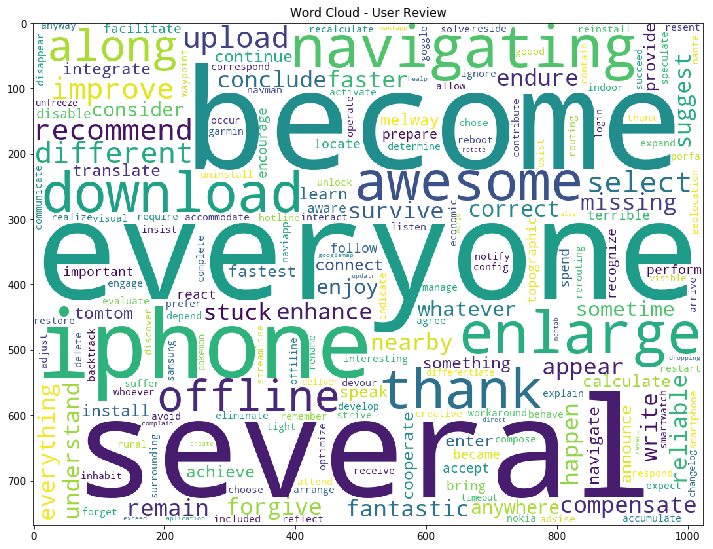

In [17]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(vocabulary))
plt.imshow(wordcloud)
plt.title('Word Cloud - User Review')
plt.show()

# Latent Dirichlet Allocation

In [18]:
lst = [i for i in df['text']]

In [19]:
lst[:3],len(lst),type(lst)

(['comment obviously',
  'blank downloading',
  'alternate blank really believe people junsuh wrote review order'],
 408648,
 list)

In [20]:
# Count the word frequency in the dataset
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000

count_of_vectors=CountVectorizer(max_features=max_features)
sparce_matrix=count_of_vectors.fit_transform(lst).toarray()

# all_words is a list ordered by word frequency
all_words=count_of_vectors.get_feature_names()
print('The 50 Most Common Words: ', all_words[0:50])

The 50 Most Common Words:  ['ability', 'abroad', 'absolutely', 'access', 'accident', 'according', 'account', 'accuracy', 'accurate', 'accurately', 'across', 'action', 'active', 'activity', 'actual', 'actually', 'added', 'adding', 'addition', 'additional', 'address', 'adjust', 'advance', 'advantage', 'advertising', 'advice', 'advise', 'afraid', 'ahead', 'alert', 'alley', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'already', 'alternate', 'alternative', 'although', 'always', 'amazing', 'amount', 'android', 'annoying', 'another', 'answer', 'anymore', 'anyone']


In [21]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
count_data =count_of_vectors.fit_transform(lst)
lda = LDA(n_components = 20, random_state = 10)
model = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(model, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis, fileobj = "vis.html")

/home/ysimokat/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [22]:
df['App Name'].value_counts()

Google Maps    234651
Waze           163252
HERE WeGo       10736
AcuraLink           9
Name: App Name, dtype: int64

## topics on each app

In [23]:
#google map
g0 = df[df['App Name']=='Google Maps']
g = [i for i in g0['text']]
#WAze
w0 = df[df['App Name']=='Waze']
w = [i for i in w0['text']]
#Here WeGo
h0 = df[df['App Name']=='HERE WeGo']
h = [i for i in h0['text']]
#AcuraLink
a0 = df[df['App Name']=='AcuraLink']
a = [i for i in a0['text']]

In [24]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
max_features=100

count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(g)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_google.html")

In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
count_data =count_of_vectors.fit_transform(w)
lda = LDA(n_components = 10, random_state = 10)
model_w = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(model_w, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis, fileobj = "vis_waze.html")

In [26]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
count_data =count_of_vectors.fit_transform(h)
lda = LDA(n_components = 10, random_state = 10)
model_h = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(model_h, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis, fileobj = "vis_here_wego.html")

In [27]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
count_data =count_of_vectors.fit_transform(a)
lda = LDA(n_components = 10, random_state = 10)
model_a = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(model_a, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis, fileobj = "vis_acuralink.html")

## good/bad topics on each app 

In [28]:
#google map with bad reviews, rating <4
google_bad = g0[g0['Rating']<4]
gb = [i for i in google_bad['text']]

In [29]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
max_features=500

count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(gb)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_google_bad.html")

In [30]:
#google map with good reviews, rating = 5
google_good = g0[g0['Rating']==5]
gg = [i for i in google_good['text']]

In [31]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
max_features=500

count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(gg)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_google_good.html")

In [32]:
#waze with bad reviews, rating <4
waze_bad = w0[w0['Rating']<4]
wb = [i for i in waze_bad['text']]

max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(wb)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_waze_bad.html")

In [33]:
#waze with good reviews, rating=5
waze_good = w0[w0['Rating']==5]
wg = [i for i in waze_good['text']]

max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(wg)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_waze_good.html")

In [34]:
#here wego with bad reviews, rating <4
here_wego_bad = h0[h0['Rating']<4]
hb = [i for i in here_wego_bad['text']]

max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(hb)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_here_wego_bad.html")

In [35]:
#here wego with bad reviews, rating=5
here_wego_good = h0[h0['Rating']==5]
hg = [i for i in here_wego_good['text']]

max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(hg)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_here_wego_good.html")

In [36]:
#acuraLink with bad reviews, rating <4
acuralink_bad = a0[a0['Rating']<4]
ab = [i for i in acuralink_bad['text']]

max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(ab)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_acuraLink_bad.html")

In [37]:
#acuraLink with bad reviews, rating=5
acuralink_good = a0[a0['Rating']==5]
ag = [i for i in acuralink_good['text']]
ag

[]

In [38]:
'''
max_features=500
count_of_vectors=CountVectorizer(max_features=max_features)
count_data =count_of_vectors.fit_transform(ag)
lda = LDA(n_components = 10, random_state = 10)
model_g = lda.fit(count_data)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds='tsne')
saved = pyLDAvis.save_html(vis1, fileobj = "vis_acuraLink_good.html")
'''

'\nmax_features=500\ncount_of_vectors=CountVectorizer(max_features=max_features)\ncount_data =count_of_vectors.fit_transform(ag)\nlda = LDA(n_components = 10, random_state = 10)\nmodel_g = lda.fit(count_data)\n\nimport pyLDAvis\nimport pyLDAvis.sklearn\npyLDAvis.enable_notebook()\nvis1 = pyLDAvis.sklearn.prepare(model_g, count_data, count_of_vectors, mds=\'tsne\')\nsaved = pyLDAvis.save_html(vis1, fileobj = "vis_acuraLink_good.html")\n'

In [39]:
model.components_.shape

(20, 1000)

In [40]:
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora import Dictionary
import gensim

/home/ysimokat/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [41]:
corpus0 = [i.strip().split() for i in lst]

In [42]:
corpus0[:2]

[['comment', 'obviously'], ['blank', 'downloading']]

In [43]:
dct = Dictionary(corpus0)
dct

In [44]:
# Convert the list reviews into a Document Term Matrix
corpus = [dct.doc2bow(line) for line in corpus0]  # convert corpus to BoW format

In [45]:
corpus[2]

[(2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]

In [46]:
#calculate TF-IDF on the bag of words vectors
tfidf = TfidfModel(corpus)

In [47]:
corpus_tfidf = tfidf[corpus]

In [48]:
import warnings
warnings.simplefilter("ignore")

In [49]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, data, corpus, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = dictionary,
                                           num_topics = num_topics,
                                           random_state = 10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = lda_model,
                                        texts = data, 
                                        dictionary = dictionary,
                                        coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [50]:
start = 1
stop = 20
step = 1
#whole data set
model_list, coherence_values = compute_coherence_values(dictionary = dct, 
                                                        data = corpus0, corpus = corpus, 
                                                        start = start, limit = stop,
                                                       step = step)

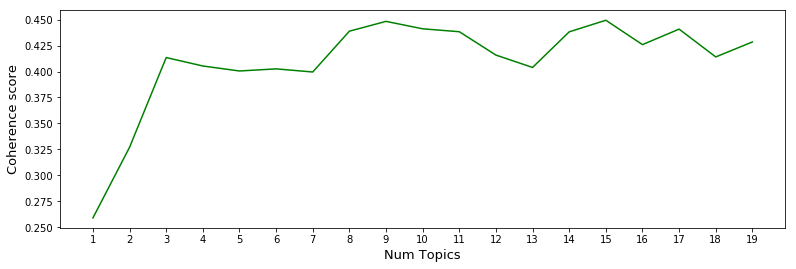

In [51]:
#plot the coherence values
x = range(1,20,1)  #start.limit,steps
plt.figure(figsize = (13, 4))
plt.plot(x, coherence_values, color = 'green')
plt.xlabel("Num Topics", fontsize = 13)
plt.ylabel("Coherence score", fontsize = 13)
plt.xticks(x)
plt.show()

have a number of topics on X-axis and coherence score on Y-axis. 
Of the number of topics, 9 have the highest coherence score, so the optimum number of topics are 9.

Running LDA using Bag of Words

In [52]:
#Train our lda model using gensim.models.LdaMulticore
lda_model = gensim.models.LdaMulticore(corpus, num_topics=9, id2word=dct, passes=2, workers=2)

In [53]:
for index, score in sorted(lda_model[corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.show_topic(index, 10)))


Score: 0.37037160992622375	 
Topic: [('google', 0.11333069), ('better', 0.06457213), ('location', 0.046821464), ('review', 0.015759548), ('nothing', 0.015621065), ('search', 0.015472289), ('point', 0.014735438), ('never', 0.012383577), ('feature', 0.012135126), ('place', 0.011977312)]

Score: 0.370304673910141	 
Topic: [('great', 0.28324017), ('excellent', 0.17745323), ('useful', 0.11771877), ('application', 0.0429801), ('program', 0.021964287), ('comment', 0.021526854), ('practical', 0.017225236), ('convenient', 0.015740875), ('simple', 0.011689883), ('congratulation', 0.009333553)]

Score: 0.03706411272287369	 
Topic: [('application', 0.15390208), ('thank', 0.05395301), ('place', 0.03530348), ('battery', 0.020502051), ('travel', 0.016927341), ('guide', 0.016757807), ('right', 0.012949767), ('superb', 0.010239009), ('handy', 0.008438373), ('trouble', 0.007864453)]

Score: 0.03705388680100441	 
Topic: [('really', 0.073570855), ('awesome', 0.056137577), ('thanks', 0.051726993), ('work'

In [54]:
# Transfer both model to document-topic matrix with corresponding probability
lda = []
for i in corpus:
    lda1 = []
    for index, prob in lda_model[i]:
        lda1.append(prob)
    lda.append(lda1)

In [55]:
df_lda = pd.DataFrame(lda,columns=['w1','w2','w3','w4','w5','w6','w7','w8','w9'])
df_lda.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9
0,0.370375,0.037047,0.037037,0.037048,0.037061,0.037037,0.037054,0.370305,0.037037
1,0.037062,0.037037,0.037037,0.037037,0.370345,0.370370,0.037037,0.037037,0.037037
2,0.540890,0.011111,0.133748,0.011117,0.011116,0.011112,0.258680,0.011114,0.011112
3,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.555556,0.055556
4,0.152596,0.066358,0.219728,0.272566,0.059252,0.213622,NaN,NaN,NaN


In [56]:
df_lda['rating'] = df['Rating']

In [57]:
df_lda.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,rating
0,0.370375,0.037047,0.037037,0.037048,0.037061,0.037037,0.037054,0.370305,0.037037,5
1,0.037062,0.037037,0.037037,0.037037,0.370345,0.370370,0.037037,0.037037,0.037037,1
2,0.540890,0.011111,0.133748,0.011117,0.011116,0.011112,0.258680,0.011114,0.011112,3
3,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.555556,0.055556,5
4,0.152596,0.066358,0.219728,0.272566,0.059252,0.213622,NaN,NaN,NaN,2


In [58]:
df_lda.isnull().sum()

w1            0
w2          139
w3         1454
w4         6400
w5        14939
w6        23655
w7        29482
w8        32373
w9        33520
rating        0
dtype: int64

In [59]:
df_lda.shape

(408648, 10)

In [60]:
w1 = df_lda['w9'].mean()
w2 = df_lda['w2'].mean()
w3 = df_lda['w3'].mean()
w4 = df_lda['w4'].mean()
w5 = df_lda['w5'].mean()
w6 = df_lda['w6'].mean()
w7 = df_lda['w7'].mean()
w8 = df_lda['w8'].mean()
df_lda['w9'].fillna(w1,axis=0,inplace=True)
df_lda['w2'].fillna(w2,axis=0,inplace=True)
df_lda['w3'].fillna(w3,axis=0,inplace=True)
df_lda['w4'].fillna(w4,axis=0,inplace=True)
df_lda['w5'].fillna(w5,axis=0,inplace=True)
df_lda['w6'].fillna(w6,axis=0,inplace=True)
df_lda['w7'].fillna(w7,axis=0,inplace=True)
df_lda['w8'].fillna(w8,axis=0,inplace=True)

In [61]:
df_lda.isnull().sum()

w1        0
w2        0
w3        0
w4        0
w5        0
w6        0
w7        0
w8        0
w9        0
rating    0
dtype: int64

In [62]:
df_lda.describe().T

,count,mean,std,min,25%,50%,75%,max
w1,408648.0,0.111967,0.132342,0.010101,0.037037,0.055556,0.111111,0.996568
w2,408648.0,0.147216,0.173898,0.010101,0.055556,0.111111,0.111111,0.953189
w3,408648.0,0.112205,0.133070,0.010101,0.037038,0.055556,0.111111,0.932874
w4,408648.0,0.105418,0.127017,0.010101,0.037037,0.055556,0.111111,0.911102
w5,408648.0,0.103079,0.121994,0.010101,0.037037,0.055556,0.111111,0.919192
w6,408648.0,0.101191,0.118295,0.010101,0.037037,0.055556,0.111111,0.919177
w7,408648.0,0.104079,0.123380,0.010101,0.037037,0.055556,0.111111,0.911107
w8,408648.0,0.127521,0.154469,0.010044,0.037037,0.111111,0.111111,0.919192
w9,408648.0,0.124491,0.152648,0.010101,0.037048,0.055583,0.111111,0.919189
rating,408648.0,4.137757,1.357826,1.000000,4.000000,5.000000,5.000000,5.000000


In [63]:
corr = df_lda.corr()

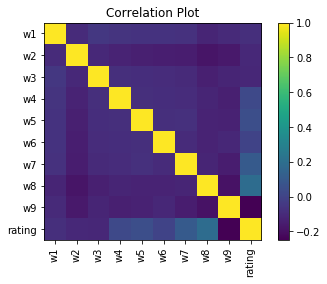

In [64]:
names = df_lda.columns
fig,ax = plt.subplots()
d = ax.imshow(corr)
plt.colorbar(d)
ax.set_title("Correlation Plot")
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
#rotate x tick lables
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [65]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from numpy import *
import numpy as np

#split the data into trainning and test sets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [66]:
y = df_lda['rating']
x = df_lda.drop('rating',axis=1)

In [67]:
import numpy as np
x = np.array(x)
y = np.array(y).reshape(-1,1)

In [68]:
#Normalization
#each feature is scaled to [0,1] range
min_max_scaler = preprocessing.MinMaxScaler()
x_norm = min_max_scaler.fit_transform(x)
x_norm

array([[0.36521631, 0.02857167, 0.02919029, ..., 0.02991418, 0.39626224,
        0.02962971],
       [0.02733135, 0.02856153, 0.02919029, ..., 0.02989551, 0.02969094,
        0.02962972],
       [0.53807104, 0.00107145, 0.13399465, ..., 0.2758903 , 0.00117764,
        0.00111168],
       ...,
       [0.00384536, 0.22285184, 0.00411253, ..., 0.19753295, 0.21276623,
        0.00418486],
       [0.02730556, 0.02856153, 0.02919029, ..., 0.39985239, 0.02969094,
        0.02962972],
       [0.00853328, 0.38754541, 0.00912522, ..., 0.53792508, 0.00932185,
        0.00925954]])

In [69]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)

In [70]:
y_norm = min_max_scaler.fit_transform(y)
y_norm

array([[1.  ],
       [0.  ],
       [0.5 ],
       ...,
       [1.  ],
       [1.  ],
       [0.75]])

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=33)

In [73]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=120,max_depth=12)
rf.fit(x_train, y_train)
y_pred_1= rf.predict(x_test)

In [74]:
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
print(rf_train_score,rf_test_score)

0.3278110222174453 0.25739269531545494


In [75]:
rf_scores = np.sqrt(-cross_val_score(rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error'))
rf_scores = np.mean(rf_scores)
rf_scores

0.2918945556088429

In [76]:
from sklearn.model_selection import KFold

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x_norm,y_norm)

kf = KFold(n_splits=5)
x_err = 0
for train,test in kf.split(x_norm):
    linreg.fit(x_norm[train],y_norm[train])
    p = linreg.predict(x_norm[test])  #compute rmse on training data
    e = p-y_norm[test]
    x_err += np.dot(e.T,e)
    
rmse_10cv = np.sqrt(x_err/len(x_norm))

In [77]:
rmse_10cv[0][0]

0.3117212263484787

In [78]:
#Gradient Boosting for Regression
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=500, max_depth=6,loss='ls',random_state=42)
gb.fit(x_train, y_train)
y_pred_3 = gb.predict(x_test)

In [79]:
gradient_scores = np.sqrt(-cross_val_score(gb, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
gradient_scores= np.mean(gradient_scores)
gradient_scores

0.29276095247705347

In [80]:
gb_train_score = gb.score(x_train, y_train)
gb_test_score = gb.score(x_test, y_test)
print(gb_train_score,gb_test_score)

0.3187126057293195 0.252479988221324


In [81]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
#dec = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=6)
dec = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=6, random_state=42)
dec.fit(x_train, y_train)
y_pred_4 = dec.predict(x_test)

In [82]:
dec_scores = np.sqrt(-cross_val_score(dec, x_train, y_train, cv=25, scoring='neg_mean_squared_error'))
dec_scores = np.mean(dec_scores)
dec_scores

0.30108953038151504

In [83]:
# Ridge Regression
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=10)
ridge.fit(x_train, y_train)
y_pred_5 = ridge.predict(x_test)

In [84]:
ridge_scores = np.sqrt(-cross_val_score(ridge, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
ridge_scores = np.mean(ridge_scores)
ridge_scores

0.311678119072885

In [85]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(10,  weights="uniform")
knn.fit(x_train, y_train)
y_pred_6 = knn.predict(x_test)

In [86]:
knn_scores = np.sqrt(-cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
knn_scores = np.mean(knn_scores)
knn_scores

0.3044610128812105

In [87]:
#linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_8 = linear.predict(x_test)

In [88]:
linear_scores = np.sqrt(-cross_val_score(linear, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
linear_scores = np.mean(linear_scores)
linear_scores

0.3116781189641803

In [89]:
# XGB Boost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred_9 = xgb.predict(x_test)

In [90]:
xgb_scores = np.sqrt(-cross_val_score(xgb, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
xgb_scores = np.mean(xgb_scores)
xgb_scores

0.2978254493153599

In [91]:
df_lda.shape

(408648, 10)

In [92]:
df_lda.to_csv('lda.csv',index=False)